In [17]:
# import modules

import pandas as pd
import numpy as np
import collections
import os
%matplotlib inline

In [8]:
encode_file = open('./processed/train.enc', 'rb')
decode_file = open('./processed/train.dec', 'rb')
encode_vocab_file = open('./processed/vocab.enc', 'rb')
decode_vocab_file = open('./processed/vocab.dec', 'rb')
encode_lines = encode_file.readlines()
decode_lines = decode_file.readlines()
decode_vocab = encode_vocab_file.readlines()
encode_vocab = decode_vocab_file.readlines()

In [9]:
encode_decode = pd.DataFrame({"encode": encode_lines, "decode": decode_lines})

In [11]:
encode_decode['dec_length'] = encode_decode['decode'].apply(len)

In [12]:
encode_decode['enc_length'] = encode_decode['encode'].apply(len)

In [25]:
encode_decode['decode'][encode_decode['dec_length']> 3040].values

array([ 'Then let\'s begin with the story itself. It\'s a story of the Grail myth...And although there are several variations, my favorite begins with the Fisher King as a young boy... who had to spend a night alone in the forest to prove his courage... and during that night, he is visited by a sacred vision. Out of the fire, appears the Holy Grail - God\'s highest symbol of divine grace. And a voice says to the boy, "You shall be the guardian of the Grail, that it may heal the hearts of men"...But the boy was overcome ...Innocent and foolish, he was blinded by greater visions - a life ahead filled with beauty and glory, hope and power...Tears filled his eyes as he sensed his own... invincibility. A boy\'s tears of naive wonder and inspiration. and in this state of...radical amazement...he felt for a brief moment, not like a boy, but like God...  ...And so he reached into the fire to take the Grail. And the Grail vanished. And the boy hands were left caught in the flames...leaving him 

In [21]:
encode_decode['enc_length'].describe()

count    196616.000000
mean         54.683500
std          60.829384
min           1.000000
25%          20.000000
50%          35.000000
75%          68.000000
max        1904.000000
Name: enc_length, dtype: float64

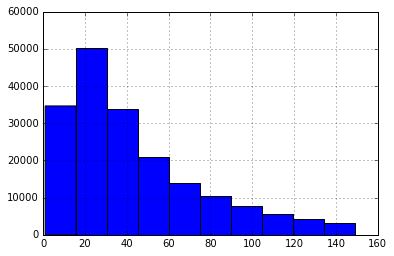

In [30]:
encode_decode['enc_length'][encode_decode['enc_length'] <150].hist()

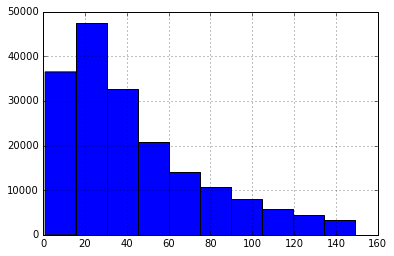

In [32]:
encode_decode['dec_length'][encode_decode['dec_length'] <150].hist()

In [89]:
bucket_size = len(encode_decode['dec_length'])/3
bucket_size

65538

In [52]:
limited = encode_decode['dec_length'][encode_decode['dec_length']<150]

In [53]:
len(limited)

183473

In [72]:
num, val = np.histogram(encode_decode['dec_length'][encode_decode['dec_length']<150], bins=500)
dec_lengths = []
i = 0
bucket_size = len(limited)/3
for j in range(3):
    num_sentences = 0
    while num_sentences < bucket_size and i <500:
        num_sentences += num[i]
        i+=1
    dec_lengths.append(val[i])

In [73]:
dec_lengths

[23.199999999999999, 50.135999999999996, 149.0]

In [76]:
num_enc, val_enc = np.histogram(encode_decode['enc_length'][encode_decode['enc_length']<150], bins=500)
enc_lengths = []
i = 0
bucket_size = len(limited)/3
for j in range(3):
    num_sentences = 0
    while num_sentences < bucket_size and i <500:
        num_sentences += num_enc[i]
        i+=1
    enc_lengths.append(val_enc[i])

In [77]:
enc_lengths

[23.199999999999999, 49.247999999999998, 149.0]

In [81]:
float(len(encode_decode['enc_length'][encode_decode['enc_length']<120]))/len(encode_decode['enc_length'])

0.9017526549212679

In [103]:
bucket_1 = len(encode_decode[(encode_decode['enc_length'] <=24)]) + len(encode_decode[(encode_decode['dec_length'] <=24)])
bucket_1/2

65945

In [104]:
bucket_2 = len(encode_decode[(encode_decode['enc_length'] >24) & (encode_decode['enc_length'] <=55)]) + len(encode_decode[(encode_decode['dec_length'] >24) & (encode_decode['dec_length'] <=55)])
bucket_2/2

66266

In [105]:
bucket_3 = len(encode_decode[(encode_decode['enc_length'] >55)]) + len(encode_decode[(encode_decode['dec_length'] >55)])
bucket_3/2

64404

In [9]:
index = 10
print (encode_lines[index], '\n',decode_lines[index])

b"Right.  See?  You're ready for the quiz.\n" 
 b"I don't want to know how to say that though.  I want to know useful things. Like where the good stores are.  How much does champagne cost?  Stuff like Chat.  I have never in my life had to point out my head to someone.\n"


In [11]:
len(decode_vocab)

24467

In [12]:
len(encode_vocab)

24635

# Data exploration

- top 100 most frequently occuring words excluding stop words
- top 100 most frequently occuring bigrams
- sentence length distribution 


In [4]:
import re
def char_tokenizer(line, normalize_digits=True):
    """ A basic tokenizer to tokenize text into tokens.
    Feel free to change this to suit your need. """
    line = re.sub('<u>', '', line)
    line = re.sub('</u>', '', line)
    line = re.sub('\[', '', line)
    line = re.sub('\]', '', line)
    chars = []
    _DIGIT_RE = re.compile(r"\d")
    for char in line.strip().lower():
        if not char:
            continue
        chars.append(char)
    return chars

In [5]:
# from data import basic_tokenizer, char_tokenizer
from collections import OrderedDict
from nltk.corpus import stopwords
# stop = set(stopwords.words('english'))
# stop.update(['.', "'", ",", "-", "!", "?", "#", '*', ";",'"'])
PROCESSED_PATH = './processed_char'

def build_vocab(filename, normalize_digits=True):
    in_path = os.path.join(PROCESSED_PATH, filename)
    out_path = os.path.join(PROCESSED_PATH, 'vocab.{}'.format(filename[-3:]))

    vocab = {}
    with open(in_path, 'rb') as f:
        for line in f.readlines():
            for token in char_tokenizer(line):
                if not token in vocab:
                    vocab[token] = 0
                vocab[token] += 1

    return OrderedDict(sorted(vocab.items(), key=lambda(k,v):(v,k), reverse=True))

In [26]:
train_vocab = build_vocab('train.enc')

In [27]:
train_vocab

OrderedDict([('know', 13878),
             ('like', 9538),
             ('get', 8579),
             ('want', 7219),
             ('got', 7178),
             ('think', 6971),
             ('one', 6713),
             ('go', 6090),
             ('well', 5988),
             ('right', 5878),
             ('going', 5718),
             ('see', 5009),
             ('oh', 4773),
             ('yes', 4557),
             ('good', 4487),
             ('tell', 4438),
             ('time', 4174),
             ('yeah', 4124),
             ('come', 4060),
             ('would', 4052),
             ('say', 4015),
             ('back', 3853),
             ('could', 3843),
             ('man', 3732),
             ('us', 3589),
             ('look', 3569),
             ('something', 3507),
             ('take', 3419),
             ('never', 3407),
             ('let', 3405),
             ('mean', 3384),
             ('really', 3013),
             ('way', 2989),
             ('make', 2942),
             ('

In [6]:
train_vocab = build_vocab('train.dec')

In [7]:
train_vocab

OrderedDict([(' ', 1948268),
             ('e', 939431),
             ('t', 778658),
             ('o', 734314),
             ('a', 612499),
             ('i', 586307),
             ('n', 541422),
             ('h', 469390),
             ('s', 463018),
             ('r', 416585),
             ('l', 338142),
             ('.', 332355),
             ('u', 314153),
             ('d', 294119),
             ('y', 280100),
             ('w', 223839),
             ('m', 223792),
             ('g', 189211),
             ('c', 170325),
             ("'", 142339),
             ('f', 138222),
             ('b', 126944),
             ('k', 116963),
             ('p', 115789),
             (',', 109364),
             ('v', 80496),
             ('?', 66176),
             ('-', 49775),
             ('!', 23385),
             ('j', 22255),
             ('x', 10291),
             ('"', 6464),
             ('z', 6186),
             ('q', 4377),
             ('0', 1523),
             ('1', 1182),
       